# Trabalho Final 
Neste trabalho final você irá pôr em prática todas as etapas exercitadas ao longo da mentoria sobre projetos de aprendizado de máquina em uma tarefa de classificação de NLP: detecção de sarcasmo. Segundo Yaghoobian et al:

“Sarcasm detection is the task of identifying irony containing utterances in sentiment-bearing text. However, the figurative and creative nature of sarcasm poses a great challenge for affective computing systems performing sentiment analysis.”

Detecção de sarcasmo é uma tarefa com muitas aplicações práticas interessantes,  mas também é extremamente desafiadora. Padrões linguísticos e sociais que categorizam o sarcasmo podem não estar contido unicamente no texto ou no uso de palavras específicas, dificultando que algoritmos de aprendizado de máquina aprendam a generalizar. Nesse contexto, foi proposto por Khodak et al o dataset SARC, coletado da plataforma Reddit:


“We introduce the Self-Annotated Reddit Corpus (SARC), a large corpus for sarcasm research and for training and evaluating systems for sarcasm detection. The corpus has 1.3 million sarcastic statements -- 10 times more than any previous dataset -- and many times more instances of non-sarcastic statements, allowing for learning in both balanced and unbalanced label regimes. Each statement is furthermore self-annotated -- sarcasm is labeled by the author, not an independent annotator -- and provided with user, topic, and conversation context.”


Em anexo, encontra-se uma amostra do SARC. Dado esse contexto, você deverá criar e validar um modelo de detecção de sarcasmo utilizando esse dataset. O trabalho deverá conter:


1. Análise exploratória

    a. Mostre exemplos de cada classe.

    b. Crie pelo menos 5 gráficos, contendo um que mostre o balanceamento entre as classes. Sugestões de outros gráficos:    termos mais frequentes em cada classe, distribuição da quantidade de palavras em cada classe.

    c. Discuta seus achados.


2. Aprendizado não-supervisionado

    a. Qualquer técnica pode ser utilizada, clusterização ou redução de dimensionalidade. Pode-se usar parte da análise exploratória ou como auxiliar na classificação.


3. Limpeza e pré-processamento dos dados

    a.Pelo menos 3 técnicas de pré-processamento de texto (que já não sejam utilizadas por padrão na vetorização)

    b.Utilize alguma técnica de balanceamento de dados


4. Engenharia de atributos

    a. Selecione dentre os dados disponíveis quais devem ser utilizados como atributos de entrada e o método para representação vetorial.

    b. Utilize pelo menos dois conjuntos de atributos de entrada, comparando as performances. Justifique suas escolhas.


5. Estabelecimento de um baseline

    a.Utilize um modelo simples, não faça otimização de hiperparâmetros. Justifique sua escolha.


6. Seleção e avaliação de modelos

    a. Escolha uma ou mais métricas de desempenho apropriadas para esta tarefa.

    b. Utilize pelo menos 4 algoritmos, realizando a otimização de hiperparâmetros. Destes modelos, ao menos um deve ser um algoritmos deve ser um que não foi visto durante a mentoria. Estude o funcionamento dele. Sugestão: modelo de Deep Learning.

    c. Avalie os algoritmos com hiperparâmetros otimizados no conjunto de teste.


7. Análise de resultados

    a. Mostre exemplos dos erros (falso positivos e falso negativos) para o melhor dos algoritmos experimentados.

    b. Discuta os resultados e aponte quais seriam possíveis melhorias


8. (OPCIONAL) Interpretabilidade

    a. Utilize algum método que permita uma interpretação das predições de algum dos seus modelos.


9. (OPCIONAL) Deploy

    a. Implemente uma API para que o seu melhor modelo possa ser utilizado via requisições HTTP.

In [139]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [140]:
# Fazendo a leitura do dataset
df_sarc = pd.read_csv('sarc_sample.csv')
df_sarc

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,"Of course, just like 3.2 was the true Messiah.",ReticentHedgehog,ffxiv,1,1,0,2016-05,2016-05-02 20:20:37,Is patch 3.3 going to be our savior? Without t...
1,1,Yeah because Iran was 100% muslim prior to 197...,methmobile,worldnews,-3,-1,-1,2016-12,2016-12-30 10:21:31,I suggest you research Iran pre-1979 as well a...
2,1,WELL YOU'RE JUST A BITCH...YOU HAVE TO GO AND ...,dillydelly,nba,1,1,0,2014-05,2014-05-04 08:02:30,Warriors / Clips game threads literally add ze...
3,1,"Yeah, it's dumb to run background checks on po...",Krenolds,AskReddit,1,1,0,2014-09,2014-09-02 08:09:10,"Oh i forgot.., you get to be finger printed wh..."
4,1,"Oh, it's not that bad once you get a handle on...",ericanderton,AskReddit,4,4,0,2011-08,2011-08-24 13:17:20,Haha oh. Definitely not an option than.
...,...,...,...,...,...,...,...,...,...,...
59995,0,"room you mean like, dimension?",Tikikala,digimon,1,1,0,2016-03,2016-03-26 03:42:22,So as another guy pointed out. Huckmon might b...
59996,0,I wasn't too fond of grabner in 14 so I put Be...,mrhairybolo,hockey,1,1,0,2014-08,2014-08-10 05:57:31,Hall - Duchene - Grabner?
59997,0,he wasn't even at worlds in season 4!,Highstalker,leagueoflegends,-1,-1,0,2016-09,2016-09-19 14:41:23,Yeah he was.
59998,0,"Right, but the Trump sign...",gcbeehler5,pics,2,2,0,2016-09,2016-09-01 02:14:54,I wouldn't say you have to be liberal to appre...


## Iniciando Análise Exploratória 
(Fazer acréscimos nesse markdown)

Inicialmente será feito uma análise da quantidade de valores do dataframe para cada classe e consequentemente observar se há um desbalanceamento relevantes entres as classes. Essa análise será apresentada também através de um gráfico.

Além disso, também será apresentado uma descrição sobre o dataframe e também informações sobre as features e a label do dataframe.

In [141]:
round(df_sarc.describe(),2)

,label,score,ups,downs
count,60000.00,60000.00,60000.00,60000.00
mean,0.67,6.85,5.58,-0.14
std,0.47,42.68,39.41,0.35
min,0.00,-143.00,-143.00,-1.00
25%,0.00,1.00,0.00,0.00
50%,1.00,2.00,1.00,0.00
75%,1.00,5.00,4.00,0.00
max,1.00,3325.00,3325.00,0.00


In [142]:
df_sarc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           60000 non-null  int64 
 1   comment         59999 non-null  object
 2   author          60000 non-null  object
 3   subreddit       60000 non-null  object
 4   score           60000 non-null  int64 
 5   ups             60000 non-null  int64 
 6   downs           60000 non-null  int64 
 7   date            60000 non-null  object
 8   created_utc     60000 non-null  object
 9   parent_comment  60000 non-null  object
dtypes: int64(4), object(6)
memory usage: 4.6+ MB


In [143]:
df_sarc['label'].value_counts()

1    40000
0    20000
Name: label, dtype: int64

### Exemplo de cada classe

In [144]:
nao_sarc = df_sarc.loc[df_sarc['label'] == 0]
nao_sarc.head(5)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
40000,0,Then why fire the coach and hire Rich Rod if y...,punkinale,CFB,11,11,0,2014-12,2014-12-02 21:00:31,I don't really think that's full circle. Michi...
40001,0,"Whoa, easy there Duterte.",buckingbronco1,news,2,-1,-1,2016-12,2016-12-28 21:30:36,He did. It's a smoking gun to me. I don't give...
40002,0,"The same reason Trudeau circlejerks, and Harpe...",AngryMulcair,canada,3,3,0,2014-11,2014-11-14 23:10:39,Why are stupid and satire articles allowed on ...
40003,0,Good point but he'll still have to clean it to...,arabicfarmer27,Fitness,1,-1,-1,2016-11,2016-11-04 09:34:05,But it would be a relatively light weight fron...
40004,0,Damn if I worked for valve my personal ban lis...,MaxStavro,GlobalOffensive,72,72,0,2015-07,2015-07-10 06:39:02,Please don't be this guy.


In [158]:
sarc = df_sarc.loc[df_sarc['label'] == 1]
sarc.head(5)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,clean_comment
0,1,"Of course, just like 3.2 was the true Messiah.",ReticentHedgehog,ffxiv,1,1,0,2016-05,2016-05-02 20:20:37,Is patch 3.3 going to be our savior? Without t...,course like true messiah
1,1,Yeah because Iran was 100% muslim prior to 197...,methmobile,worldnews,-3,-1,-1,2016-12,2016-12-30 10:21:31,I suggest you research Iran pre-1979 as well a...,yeah iran muslim prior still
2,1,WELL YOU'RE JUST A BITCH...YOU HAVE TO GO AND ...,dillydelly,nba,1,1,0,2014-05,2014-05-04 08:02:30,Warriors / Clips game threads literally add ze...,well youre bitchyou go post take downvotes
3,1,"Yeah, it's dumb to run background checks on po...",Krenolds,AskReddit,1,1,0,2014-09,2014-09-02 08:09:10,"Oh i forgot.., you get to be finger printed wh...",yeah dumb run background checks potential teac...
4,1,"Oh, it's not that bad once you get a handle on...",ericanderton,AskReddit,4,4,0,2011-08,2011-08-24 13:17:20,Haha oh. Definitely not an option than.,oh bad get handle crippling depression constan...


### Gráfico 1
Apresenta a quantidade de elementos para cada classe, mostrando assim o balanceamento entre as classes.

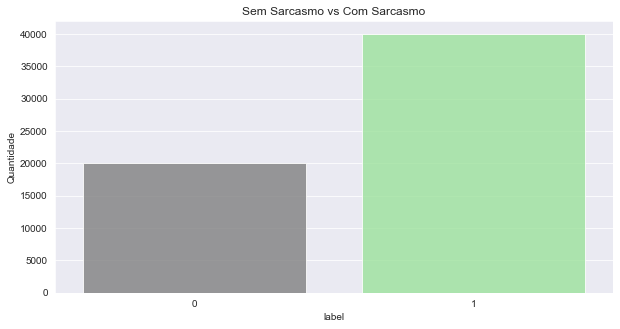

In [146]:
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df_sarc['label'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Sem Sarcasmo vs Com Sarcasmo')
plt.ylabel('Quantidade')
plt.show()

## Pré-Processamento dos Dados
(Fazer acréscimos nesse markdown)

A etapa de pré-processamento dos dados se faz necessária a continuidade da análise exploratória dos dados.

In [147]:
import string
def remocao_pontuacao(texto):
    nao_pontuado = "".join([i for i in texto if i not in string.punctuation])
    return nao_pontuado

In [148]:
def lowering(texto):
    return texto.lower()

In [149]:
import re
def remocao_numeros(texto):
    number_regex = '\d+'
    x = re.sub(number_regex, '', texto)
    return x

In [150]:
import nltk
def remocao_stopwords(texto):
    stopwords = nltk.corpus.stopwords.words('english')
    texto_stopwords = [j for j in texto.split() if j not in stopwords]
    frase = " ".join(texto_stopwords)
    return frase 

In [166]:
def preprocessamento(texto):
    texto = remocao_pontuacao(texto)
    texto = lowering(texto)
    texto = remocao_numeros(texto)
    texto = remocao_stopwords(texto)
    return texto

df_sarc['comment'] = df_sarc['comment'].astype(str)
# Criei uma nova coluna após pré-processar a coluna comment 
df_sarc['clean_comment']= df_sarc['comment'].apply(lambda x: preprocessamento(x))
df_sarc.head(15)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,clean_comment
0,1,"Of course, just like 3.2 was the true Messiah.",ReticentHedgehog,ffxiv,1,1,0,2016-05,2016-05-02 20:20:37,Is patch 3.3 going to be our savior? Without t...,course like true messiah
1,1,Yeah because Iran was 100% muslim prior to 197...,methmobile,worldnews,-3,-1,-1,2016-12,2016-12-30 10:21:31,I suggest you research Iran pre-1979 as well a...,yeah iran muslim prior still
2,1,WELL YOU'RE JUST A BITCH...YOU HAVE TO GO AND ...,dillydelly,nba,1,1,0,2014-05,2014-05-04 08:02:30,Warriors / Clips game threads literally add ze...,well youre bitchyou go post take downvotes
3,1,"Yeah, it's dumb to run background checks on po...",Krenolds,AskReddit,1,1,0,2014-09,2014-09-02 08:09:10,"Oh i forgot.., you get to be finger printed wh...",yeah dumb run background checks potential teac...
4,1,"Oh, it's not that bad once you get a handle on...",ericanderton,AskReddit,4,4,0,2011-08,2011-08-24 13:17:20,Haha oh. Definitely not an option than.,oh bad get handle crippling depression constan...
5,1,At the gates of heaven animals will be able to...,AiwassAeon,atheism,1,1,0,2014-12,2014-12-10 04:48:52,Someone please explain this hypocrisy to me. O...,gates heaven animals able talk
6,1,"Yeah, those AI matches used to be SO boring on...",pcdn,heroesofthestorm,1,1,0,2016-02,2016-02-10 18:21:38,"See, I find new nova to be loads more fun than...",yeah ai matches used boring nova
7,1,"Get with the times, pandas!",Mookyhands,AskReddit,8,8,0,2015-11,2015-11-02 22:57:00,This isn't completely true. Pandas do all of t...,get times pandas
8,1,It's called ebebephilia and it's _completely_ ...,warongiygas,ShitRedditSays,10,10,0,2015-12,2015-12-20 04:33:14,You mean you don't think denying adult men acc...,called ebebephilia completely natural
9,1,"No, it just invented *third-wave* feminism.",eschezhivet,SRSGaming,3,3,0,2016-04,2016-04-22 16:54:54,I'm fairly sure the prevailing attitude is tha...,invented thirdwave feminism


### Gráfico 2
Apresentando os termos mais frequentes em cada classe. Isso só foi possível após o pré-processamento dos textos, para que por exemplo, pontuações, não fossem escolhidos como termos mais frequentes

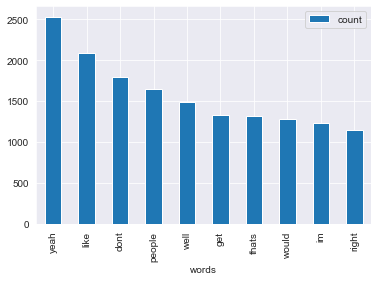

In [162]:
words = []
sarc = df_sarc.loc[df_sarc['label'] == 1]
nao_sarc = df_sarc.loc[df_sarc['label'] == 0]

#Pegando termo por termo -- classe 1
for i in sarc['clean_comment']:
    for j in i.split():
        words.append(j)

dfp = pd.DataFrame(words, columns = ['words'])
dfc = dfp.groupby('words').words.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(10).reset_index(drop=True)

dfc.plot.bar(x='words');

In [165]:
#from wordcloud import WordCloud

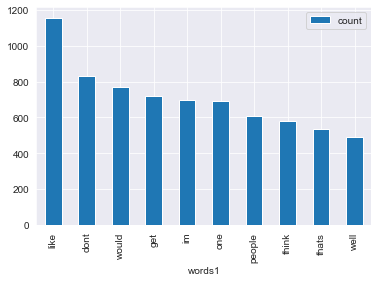

In [153]:
words1 = []
#Pegando termo por termo -- classe 0
for i in nao_sarc['clean_comment']:
    for j in i.split():
        words1.append(j)
        
dfp = pd.DataFrame (words1, columns = ['words1'])
dfc = dfp.groupby('words1').words1.count() \
                               .reset_index(name='count') \
                               .sort_values(['count'], ascending=False) \
                               .head(10).reset_index(drop=True)

dfc.plot.bar(x='words1');